## 5.7 로지스틱 회귀

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다. 회귀가 선형인지, 비선형인지는 가중치 변수가 선형인지 아닌지를 따른다. 로지스틱 회귀가 선형 회귀와 다른 점은 <u>**시그모이드 함수**</u> 최적선을 찾고, 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다.  


**시그모이드(Sigmoid) 함수**  
<img src='https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg' width="450" height="450">

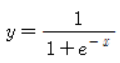

- x 값이 +,-로 아무리 커지거나 작아져도 y 값은 항상 0과 1사이 값을 반환한다.  
- x 값이 커지면 1에 근사하여 x 값이 작아지면 0에 근사한다. 그리고 x가 0일 때는 0.5이다. 

### 종양 크기에 따라 악성 종양인지(Yes=1) 그렇지 않은지(No=0)를 회귀를 이용해 예측

<img src='https://blog.kakaocdn.net/dn/OLFGf/btqCvzeKcZq/avF9KCl0GRHlJ6G8Vq4UEK/img.png' width="600" height="600">

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [11]:
## 학습 데이터 세트와 테스트 데이터 세트로 나눔

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [13]:
## GridSearchCV를 이용해 위스콘신 데이터 세트에서 하이퍼 파라미터를 최적화

from sklearn.model_selection import GridSearchCV

# 주요 하이퍼 파라미터
params={'penalty':['l2', 'l1'],        # l2 : L2 규제, l1 : L1 규제
        'C':[0.01, 0.1, 1, 1, 5, 10]} # C : 규제 강도를 조절하는 alpha값의 역수 
                                     # C값이 작을수록 규제 강도가 크다

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
